# Q.1

## Census Income

#### $$ *Project Description* $$

**_This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year_**

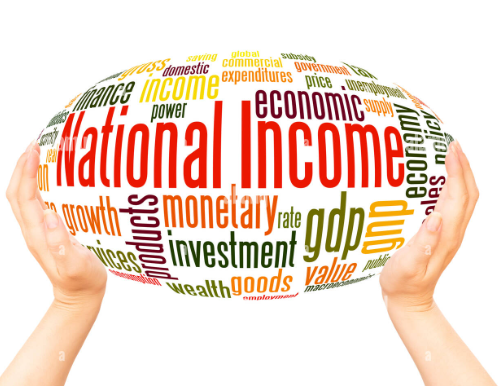

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_census = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df_census.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

# Exploratory Data Analysis (EDA)



Through the head().method we can observed 5 rows. Here we can see there are many features which are in categorical so we have to convert into numeric in order to feed our data to machine learning model. As per our problem statement we have to predict the income is below 50k or beyond. So we can convert into binary and build classification model.

In [3]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data-set contains 32560 rows and 14 features + the target variable (Income). 6 are integers and 9 are objects. Below I have listed the features with a short description:

In [4]:
df_census.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

As per above sort description we have seen in ‘count’ there is no null values in the dataset. And, we can also see ‘mean’ it shows variation among the features and values are on different scales so we have to scale the features in similar scale.

As we have checked statistical descriptions which shows only numeric data and dataset contains categorical values as well as. Therefore we have to check null values.

In [5]:
df_census.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As per above we can not see any null values in our dataset. But in the 2 features Native_country and Occupation there is ‘?’ empty which will be consider as a null values. Hence we have to replace with authentic values.

Checking the unique values of both the columns.

In [6]:
df_census['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [7]:
df_census['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [8]:
df_census.loc[df_census.Native_country==' ?']

Age          Workclass  Fnlwgt      Education  Education_num  \
13      40            Private  121772      Assoc-voc             11   
37      31            Private   84154   Some-college             10   
50      18            Private  226956        HS-grad              9   
60      32                  ?  293936        7th-8th              4   
92      30            Private  117747        HS-grad              9   
...    ...                ...     ...            ...            ...   
32448   44       Self-emp-inc   71556        Masters             14   
32468   58       Self-emp-inc  181974      Doctorate             16   
32491   42   Self-emp-not-inc  217597        HS-grad              9   
32509   39            Private  107302        HS-grad              9   
32524   81                  ?  120478      Assoc-voc             11   

               Marital_status       Occupation    Relationship  \
13         Married-civ-spouse     Craft-repair         Husband   
37         Married-civ-spouse            Sales         Husband   
50              Never-married    Other-service       Own-child   
60      Married-spouse-absent                ?   Not-in-family   
92         Married-civ-spouse            Sales            Wife   
...                       ...              ...             ...   
32448      Married-civ-spouse            Sales         Husband   
32468           Never-married   Prof-specialty   Not-in-family   
32491                Divorced            Sales       Own-child   
32509      Married-civ-spouse   Prof-specialty         Husband   
32524                Divorced                ?       Unmarried   

                      Race      Sex  Capital_gain  Capital_loss  \
13      Asian-Pac-Islander     Male             0             0   
37                   White     Male             0             0   
50                   White   Female             0             0   
60                   White     Male             0             0   
92      Asian-Pac-Islander   Female             0          1573   
...                    ...      ...           ...           ...   
32448                White     Male             0             0   
32468                White   Female             0             0   
32491                White     Male             0             0   
32509                White     Male             0             0   
32524                White   Female             0             0   

       Hours_per_week Native_country  Income  
13                 40              ?    >50K  
37                 38              ?    >50K  
50                 30              ?   <=50K  
60                 40              ?   <=50K  
92                 35              ?   <=50K  
...               ...            ...     ...  
32448              50              ?    >50K  
32468              99              ?   <=50K  
32491              50              ?   <=50K  
32509              45              ?    >50K  
32524               1              ?   <=50K  

[583 rows x 15 columns]

In [9]:
df_census.loc[df_census.Occupation==' ?']

Age Workclass  Fnlwgt      Education  Education_num  \
26      54         ?  180211   Some-college             10   
60      32         ?  293936        7th-8th              4   
68      25         ?  200681   Some-college             10   
76      67         ?  212759           10th              6   
105     17         ?  304873           10th              6   
...    ...       ...     ...            ...            ...   
32529   35         ?  320084      Bachelors             13   
32530   30         ?   33811      Bachelors             13   
32538   71         ?  287372      Doctorate             16   
32540   41         ?  202822        HS-grad              9   
32541   72         ?  129912        HS-grad              9   

               Marital_status Occupation    Relationship                 Race  \
26         Married-civ-spouse          ?         Husband   Asian-Pac-Islander   
60      Married-spouse-absent          ?   Not-in-family                White   
68              Never-married          ?       Own-child                White   
76         Married-civ-spouse          ?         Husband                White   
105             Never-married          ?       Own-child                White   
...                       ...        ...             ...                  ...   
32529      Married-civ-spouse          ?            Wife                White   
32530           Never-married          ?   Not-in-family   Asian-Pac-Islander   
32538      Married-civ-spouse          ?         Husband                White   
32540               Separated          ?   Not-in-family                Black   
32541      Married-civ-spouse          ?         Husband                White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
26        Male             0             0              60           South   
60        Male             0             0              40               ?   
68        Male             0             0              40   United-States   
76        Male             0             0               2   United-States   
105     Female         34095             0              32   United-States   
...        ...           ...           ...             ...             ...   
32529   Female             0             0              55   United-States   
32530   Female             0             0              99   United-States   
32538     Male             0             0              10   United-States   
32540   Female             0             0              32   United-States   
32541     Male             0             0              25   United-States   

       Income  
26       >50K  
60      <=50K  
68      <=50K  
76      <=50K  
105     <=50K  
...       ...  
32529    >50K  
32530   <=50K  
32538    >50K  
32540   <=50K  
32541   <=50K  

[1843 rows x 15 columns]

In the above observations we can see “Native_country” contains 583 missing values and “Occupation” contains 1816 missing values as count is huge. Although we can use simple imputer or other method like KNN imputer to fill null values. But if we will fill it probably it may biased towards the single variable. However, we have large data so we can remove it using ‘Drop’ function.

In [10]:
df_census.drop(df_census[df_census['Native_country'] == ' ?'].index,inplace=True)
# droping the bull values from both the columns
df_census.drop(df_census[df_census['Occupation'] == ' ?'].index,inplace=True)

#### Now checking the unique value count again it has removed or not

In [11]:
df_census['Native_country'].unique()

df_census.drop(df_census[df_census['Occupation'] == ' ?'].index,inplace=True)  # removeing the unnamed values


### We can see above values where “?” has been removed.



## Let’s take a more detailed look from Data Visualizations:

<AxesSubplot:>

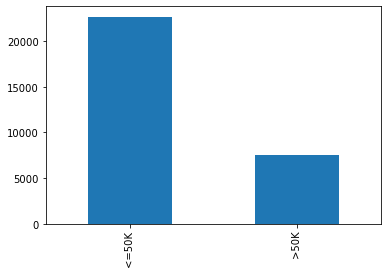

In [12]:
df_census['Income'].value_counts().plot(kind='bar')

As per above visualization of target variable we can see the ratio is imbalanced

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Transport-moving'),
  Text(7, 0, ' Farming-fishing'),
  Text(8, 0, ' Machine-op-inspct'),
  Text(9, 0, ' Tech-support'),
  Text(10, 0, ' Craft-repair'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

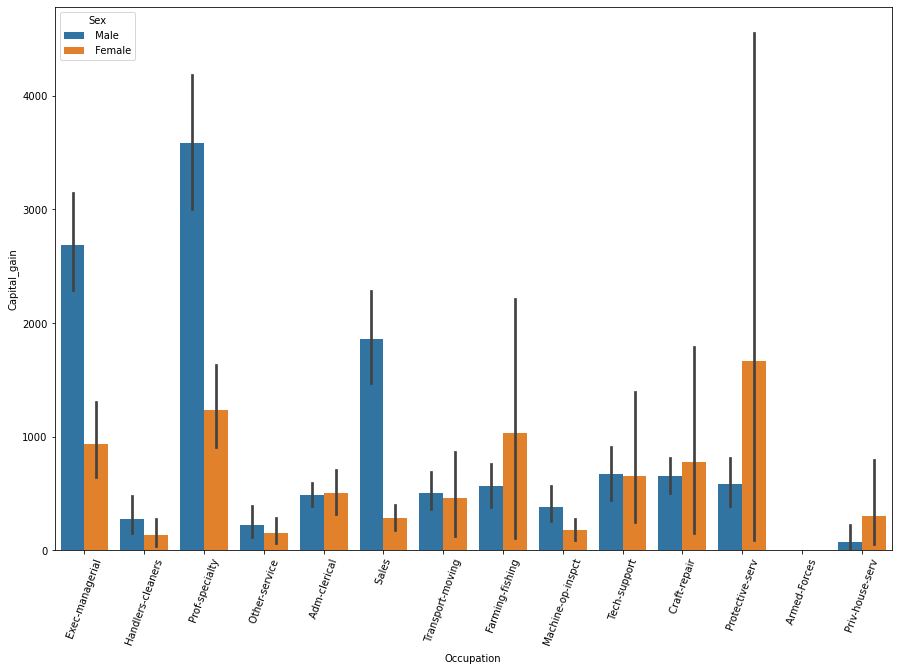

In [13]:
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_gain',data=df_census,hue='Sex')
plt.xticks(rotation=70)
##Checking the distribution of Capital_gain and  Occupation as per gender##

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

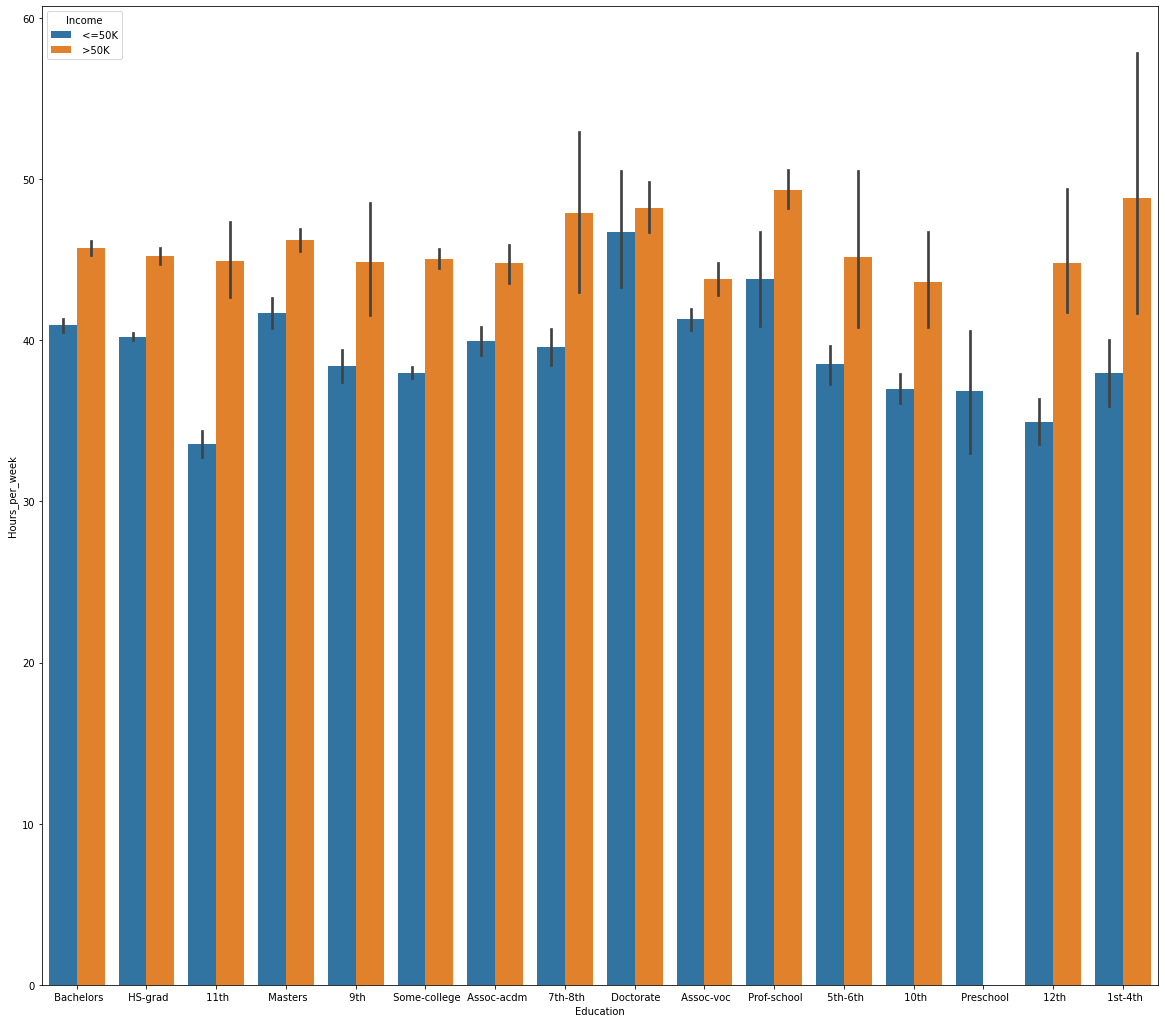

In [14]:
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=df_census,hue='Income')
##Checking the distribution of Education and  Hours_per_week as gender###

## Q.2

## Rainfall Weather Forecasting

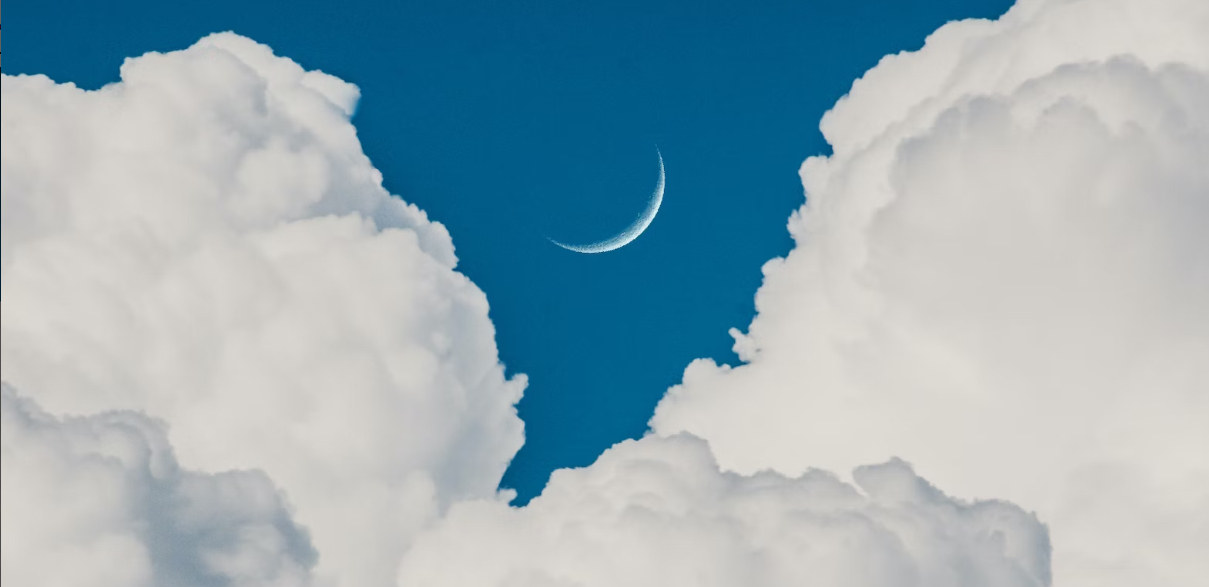

#### Project Description

In [15]:
# import lib
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [16]:
# reading dataset 
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
# Reading first five rows of our dataset 
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [18]:
df.shape

(8425, 23)

In [19]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [20]:
 df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [21]:
df.describe().T

count         mean        std    min      25%     50%     75%  \
MinTemp        8350.0    13.193305   5.403596   -2.0     9.20    13.3    17.4   
MaxTemp        8365.0    23.859976   6.136408    8.2    19.30    23.3    28.0   
Rainfall       8185.0     2.805913  10.459379    0.0     0.00     0.0     1.0   
Evaporation    4913.0     5.389395   5.044484    0.0     2.60     4.6     7.0   
Sunshine       4431.0     7.632205   3.896235    0.0     4.75     8.7    10.7   
WindGustSpeed  7434.0    40.174469  14.665721    7.0    30.00    39.0    50.0   
WindSpeed9am   8349.0    13.847646  10.174579    0.0     6.00    13.0    20.0   
WindSpeed3pm   8318.0    18.533662   9.766986    0.0    11.00    19.0    24.0   
Humidity9am    8366.0    67.822496  16.833283   10.0    56.00    68.0    80.0   
Humidity3pm    8323.0    51.249790  18.423774    6.0    39.00    51.0    63.0   
Pressure9am    7116.0  1017.640233   6.828699  989.8  1013.00  1017.7  1022.3   
Pressure3pm    7113.0  1015.236075   6.766681  982.9  1010.40  1015.3  1019.8   
Cloud9am       6004.0     4.566622   2.877658    0.0     1.00     5.0     7.0   
Cloud3pm       5970.0     4.503183   2.731659    0.0     2.00     5.0     7.0   
Temp9am        8369.0    17.762015   5.627035    1.9    13.80    17.8    21.9   
Temp3pm        8329.0    22.442934   5.980020    7.3    18.00    21.9    26.4   

                  max  
MinTemp          28.5  
MaxTemp          45.5  
Rainfall        371.0  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1

<AxesSubplot:>

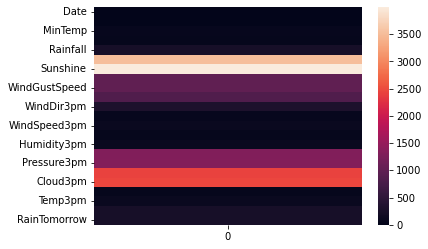

In [22]:
sns.heatmap(df.isnull().sum().to_frame())


In [23]:
# changeing into 0 and 1 of raintoday and raintomorrow
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [24]:
# checking values are converted in 0 and 1 or not 
print(df.RainToday)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: RainToday, Length: 8425, dtype: float64


In [25]:
# checking values are converted in 0 and 1 or not 
print(df.RainTomorrow)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    NaN
Name: RainTomorrow, Length: 8425, dtype: float64


In [26]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 18


In [27]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [28]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 4
Continuous feature Count 14


In [29]:
# filling the null value 
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [30]:
#Filling the missing values for continuous variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] =df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [31]:
df.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [32]:
# Group your dataframe by location and find out the averages of all numeric values.
df.groupby('Location').mean()

MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
Location                                                              
Adelaide      10.980000  10.980000  1.435237     5.121671  7.632205   
Albury        10.062587  10.062587  2.129055     5.389395  7.632205   
Brisbane      15.369073  15.369073  3.109896     4.875629  7.918155   
CoffsHarbour  13.704244  13.704244  5.434707     3.700885  7.332570   
Darwin        21.324800  21.324800  2.735200     6.349558  9.389200   
Melbourne     12.443280  12.443280  2.313878     4.529963  6.419399   
Newcastle     12.937727  12.937727  3.029054     5.389395  7.632205   
Penrith       11.279668  11.279668  2.361448     5.389395  7.632205   
PerthAirport  13.172674  13.172674  1.916279     5.784460  8.797117   
Uluru          5.997436   5.997436  0.010256     5.389395  7.632205   
Williamtown   14.245843  14.245843  3.592073     7.066091  7.748368   
Wollongong    15.404950  15.404950  3.169720     5.389395  7.632205   

              WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Location                                                               
Adelaide          37.990244     11.317073     16.404878    59.029268   
Albury            33.933951      8.248669     14.297245    72.604190   
Brisbane          26.456341      6.031088      9.685781    66.474650   
CoffsHarbour      38.872438     15.389027     20.512385    66.314239   
Darwin            39.288000     16.012000     20.204000    63.828000   
Melbourne         45.779558     19.709001     22.697904    66.754405   
Newcastle         40.174469      5.694822     12.746831    73.754842   
Penrith           31.413225      5.626556     11.024896    72.863071   
PerthAirport      44.797063     18.043189     21.353821    58.833887   
Uluru             34.901909     13.282051     16.769231    53.564103   
Williamtown       41.846836     16.584762     22.182333    72.040650   
Wollongong        46.044403     16.803336     21.871734    69.473797   

              Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Location                                                                  
Adelaide        44.809756  1020.091220  1018.074634  4.566622  4.503183   
Albury          47.062845  1017.581477  1014.981477  5.285971  4.837624   
Brisbane        54.182210  1018.123661  1015.031731  3.694301  3.898969   
CoffsHarbour    60.648527  1018.587693  1016.097781  3.816694  4.116213   
Darwin          43.932000  1013.373200  1009.524800  3.800000  3.580000   
Melbourne       51.245992  1017.845623  1016.075260  5.155148  5.127789   
Newcastle       55.915732  1017.640233  1015.236075  4.064556  4.348869   
Penrith         45.481328  1017.640233  1015.236075  4.566622  4.503183   
PerthAirport    42.131229  1017.082508  1014.548173  3.449336  3.559801   
Uluru           25.512821  1024.779487  1021.148718  4.823895  4.643637   
Williamtown     54.330487  1017.783089  1015.252683  5.314075  4.908518   
Wollongong      65.281643  1016.887090  1014.992827  5.360734  5.050148   

                Temp9am    Temp3pm  RainToday  RainTomorrow  
Location                                                     
Adelaide      15.861951  20.189756   0.214634      0.219512  
Albury        14.555347  21.673539   0.219405      0.219405  
Brisbane      20.685427  23.976141   0.233161      0.233161  
CoffsHarbour  19.611620  21.745733   0.306056      0.304419  
Darwin        25.601200  30.668000   0.132000      0.128000  
Melbourne     15.332999  19.952457   0.249075      0.250308  
Newcastle     17.433322  22.324634   0.240876      0.240876  
Penrith       15.533195  22.135270   0.240664      0.240664  
PerthAirport  19.330648  24.472176   0.200997      0.200997  
Uluru         11.523077  22.123077   0.000000      0.000000  
Williamtown   19.261951  23.663252   0.248780      0.248780  
Wollongong    18.414971  20.322906   0.265823      0.265823

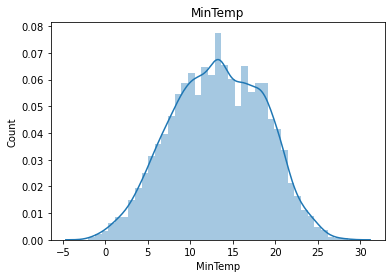

<Figure size 1080x1080 with 0 Axes>

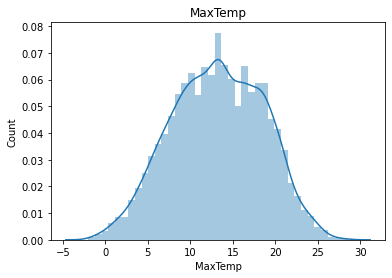

<Figure size 1080x1080 with 0 Axes>

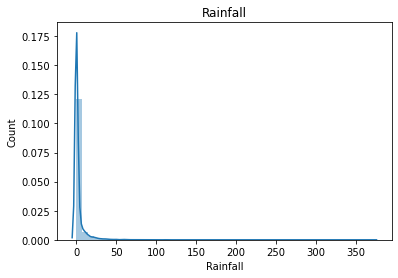

<Figure size 1080x1080 with 0 Axes>

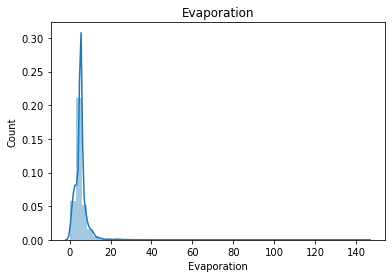

<Figure size 1080x1080 with 0 Axes>

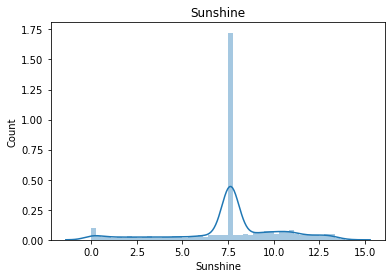

<Figure size 1080x1080 with 0 Axes>

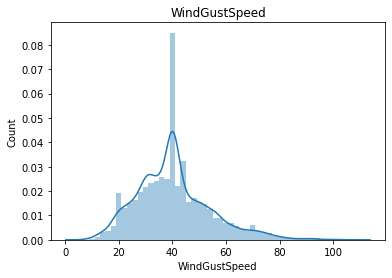

<Figure size 1080x1080 with 0 Axes>

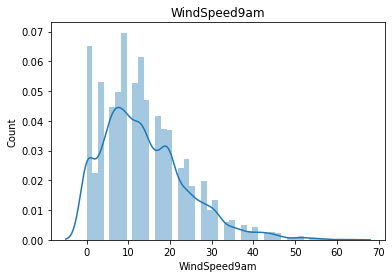

<Figure size 1080x1080 with 0 Axes>

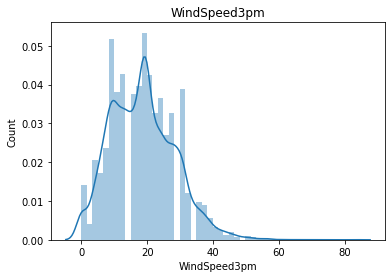

<Figure size 1080x1080 with 0 Axes>

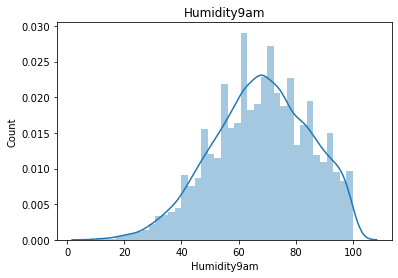

<Figure size 1080x1080 with 0 Axes>

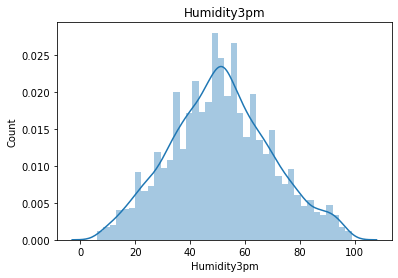

<Figure size 1080x1080 with 0 Axes>

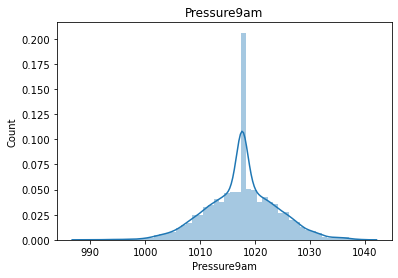

<Figure size 1080x1080 with 0 Axes>

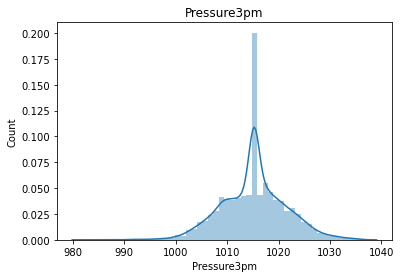

<Figure size 1080x1080 with 0 Axes>

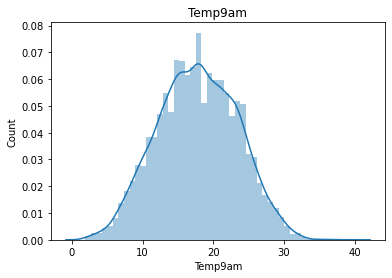

<Figure size 1080x1080 with 0 Axes>

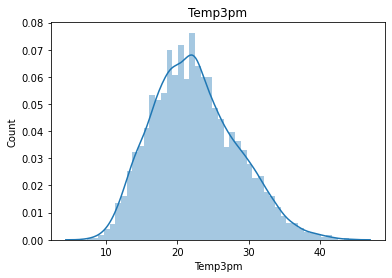

<Figure size 1080x1080 with 0 Axes>

In [33]:
# visualize 
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

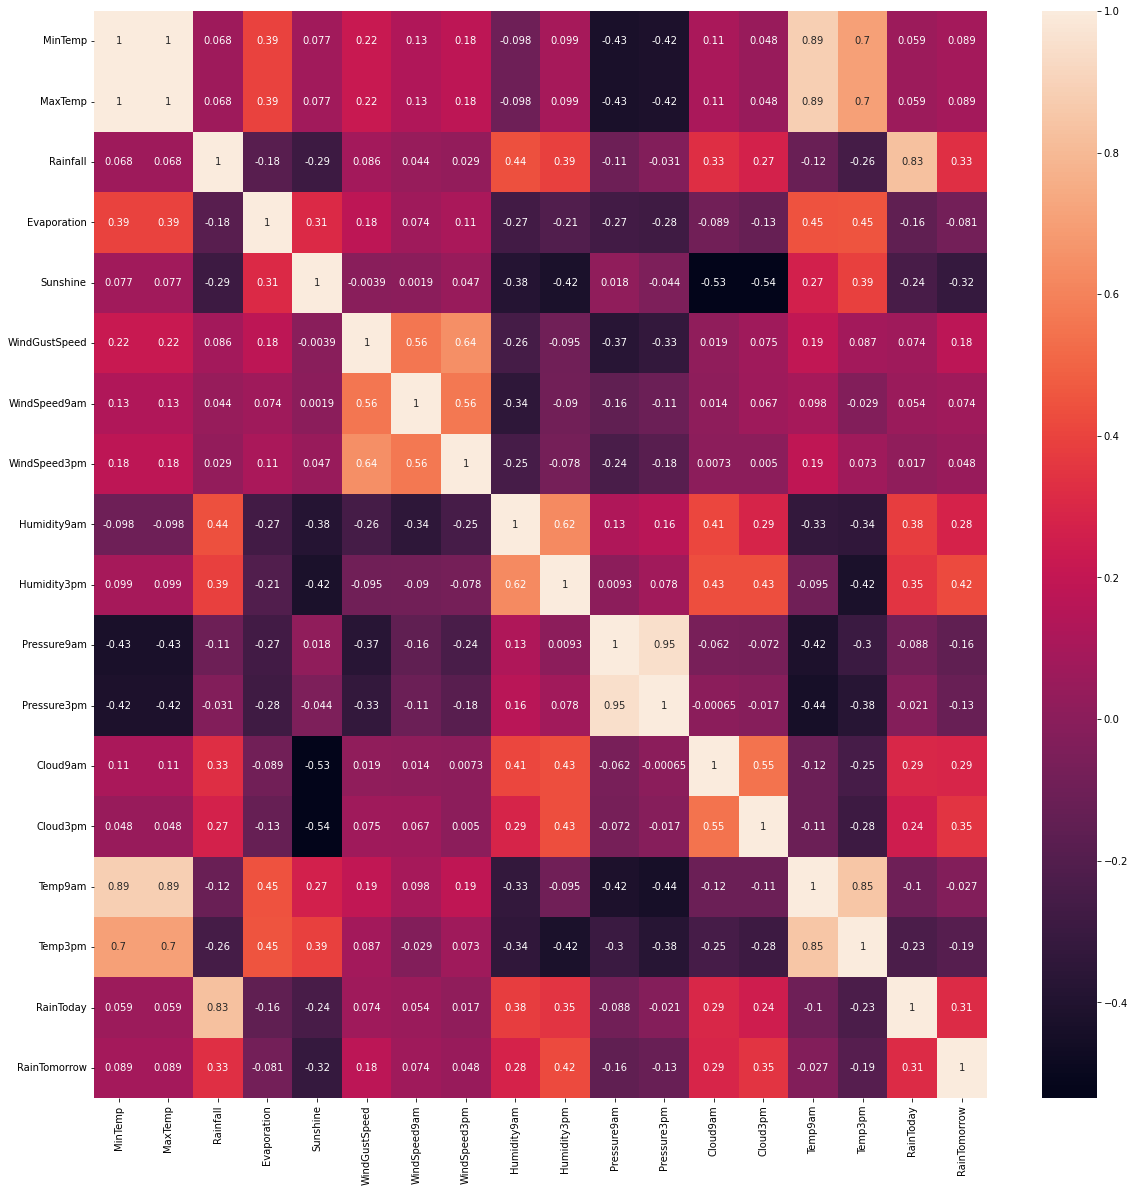

In [34]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [35]:
# doing labelencder train dataset transfer into 0,1,2...
from sklearn.preprocessing import LabelEncoder
cols = ['Location',"WindDir9am","WindDir3pm","WindGustDir"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [36]:
df.head()

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01         1     13.4     13.4       0.6     5.389395  7.632205   
1  2008-12-02         1      7.4      7.4       0.0     5.389395  7.632205   
2  2008-12-03         1     12.9     12.9       0.0     5.389395  7.632205   
3  2008-12-04         1      9.2      9.2       0.0     5.389395  7.632205   
4  2008-12-05         1     17.5     17.5       1.0     5.389395  7.632205   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0           13           44.0          13  ...         71.0         22.0   
1           14           44.0           6  ...         44.0         25.0   
2           15           46.0          13  ...         38.0         30.0   
3            4           24.0           9  ...         45.0         16.0   
4           13           41.0           1  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.503183     16.9     21.8        0.0   
1       1010.6       1007.8  4.566622  4.503183     17.2     24.3        0.0   
2       1007.6       1008.7  4.566622  2.000000     21.0     23.2        0.0   
3       1017.6       1012.8  4.566622  4.503183     18.1     26.5        0.0   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7        0.0   

   RainTomorrow  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 23 columns]

In [37]:
df=df.drop(['Date'],axis=1)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [38]:
X = df.drop(["RainTomorrow"], axis=1)
Y = df["RainTomorrow"]

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, random_state = 0)

In [41]:
# model training 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [45]:
print(accuracy_score(y_test,y_pred))

0.8433234421364986


In [46]:
print(confusion_matrix(y_test,y_pred))

[[1205   81]
 [ 183  216]]


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1286
         1.0       0.73      0.54      0.62       399

    accuracy                           0.84      1685
   macro avg       0.80      0.74      0.76      1685
weighted avg       0.83      0.84      0.83      1685



In [48]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print(accuracy_score(y_test,y_pred))

0.9020771513353115


In [51]:
print(confusion_matrix(y_test,y_pred))

[[1242   44]
 [ 121  278]]


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1286
         1.0       0.86      0.70      0.77       399

    accuracy                           0.90      1685
   macro avg       0.89      0.83      0.85      1685
weighted avg       0.90      0.90      0.90      1685



In [53]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

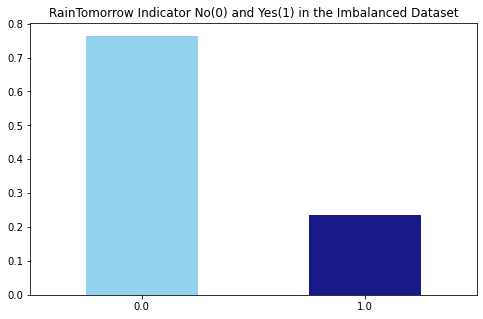

In [54]:
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

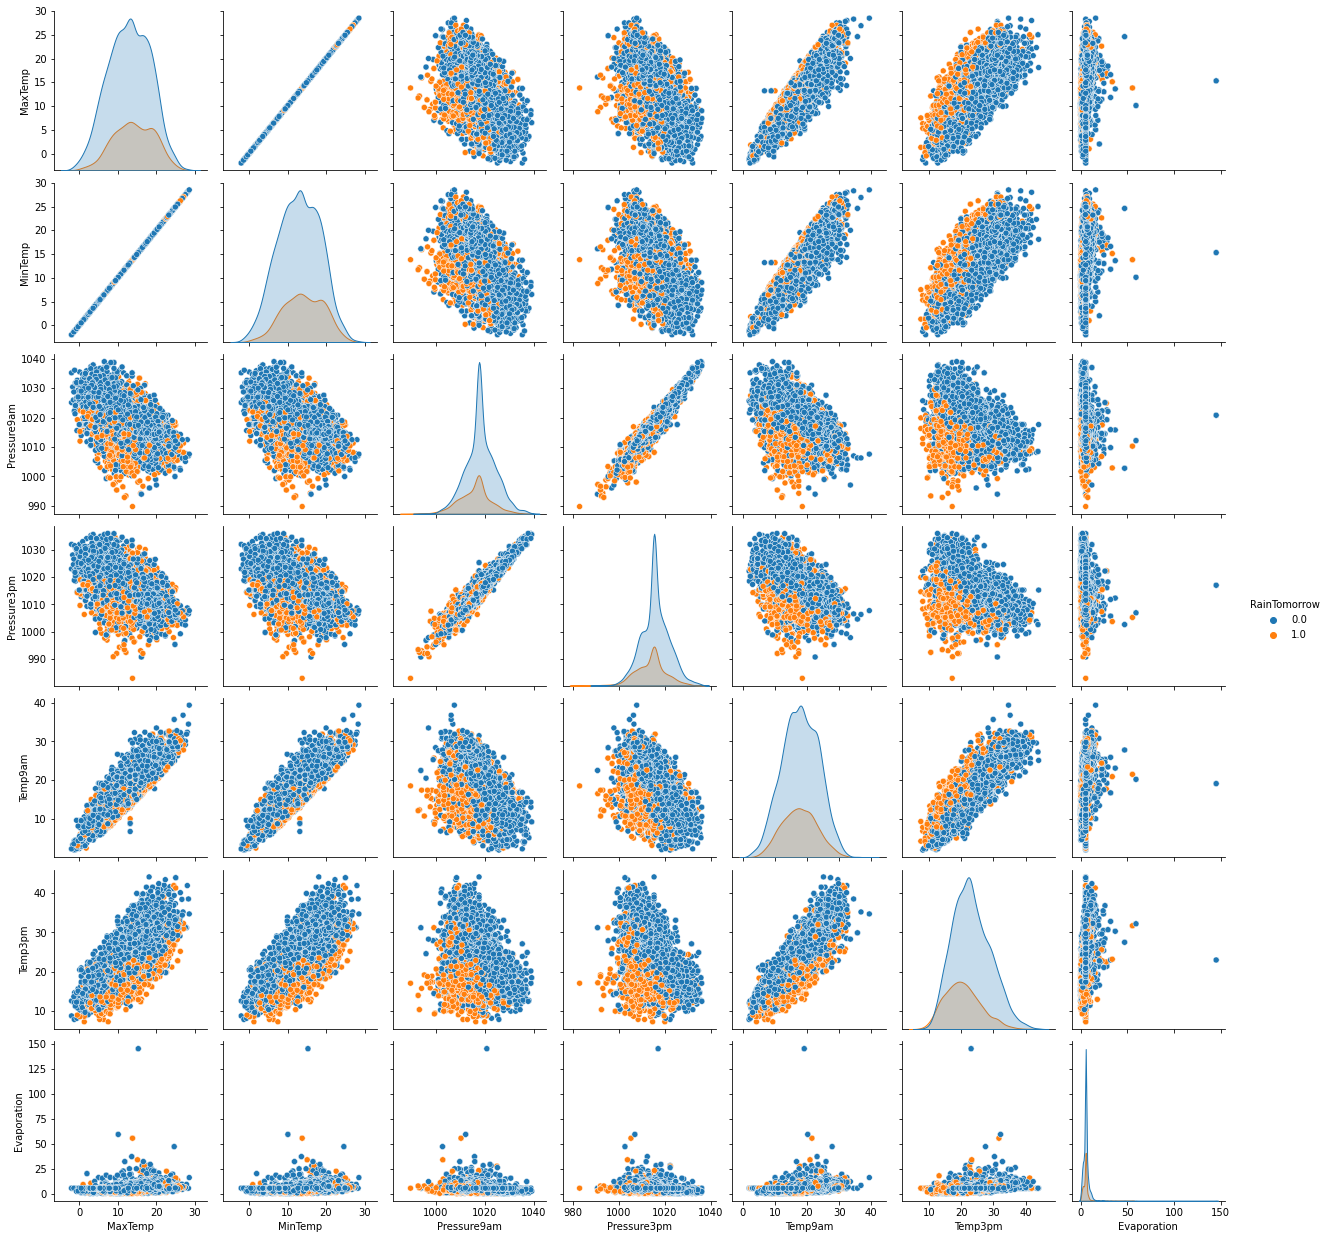

In [55]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )
plt.show()

# Q.3


## $$ Insurance Claim Fraud Detection $$


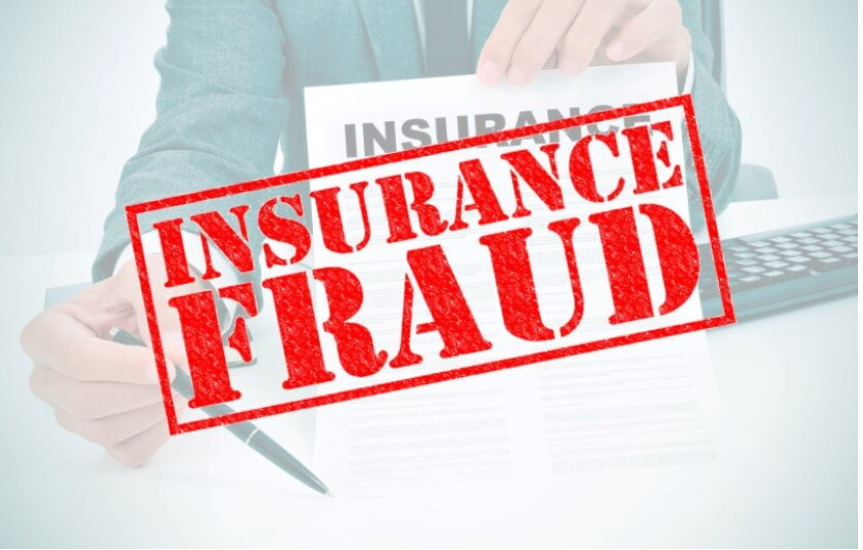

## Project Description


*Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.*


*In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.*


*In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.*


In [56]:
#Model Training
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [57]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [58]:
#Data Exploration

data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [59]:
data.shape

(1000, 40)

In [60]:

#check missing or null or any values
print("Null Values: " + str(data.isnull().any().sum()))

Null Values: 1


<AxesSubplot:xlabel='fraud_reported'>

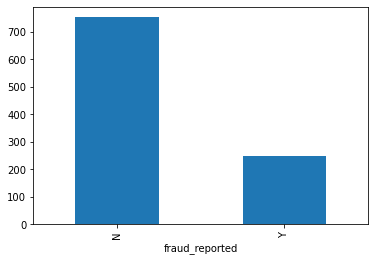

In [61]:
#Fraud Reported Stats
df_count_fraud = data.groupby(['fraud_reported']).count()
df_fraud = df_count_fraud['policy_number']
df_fraud.plot.bar(x='Fraud Reported', y='Count')

<AxesSubplot:xlabel='insured_education_level'>

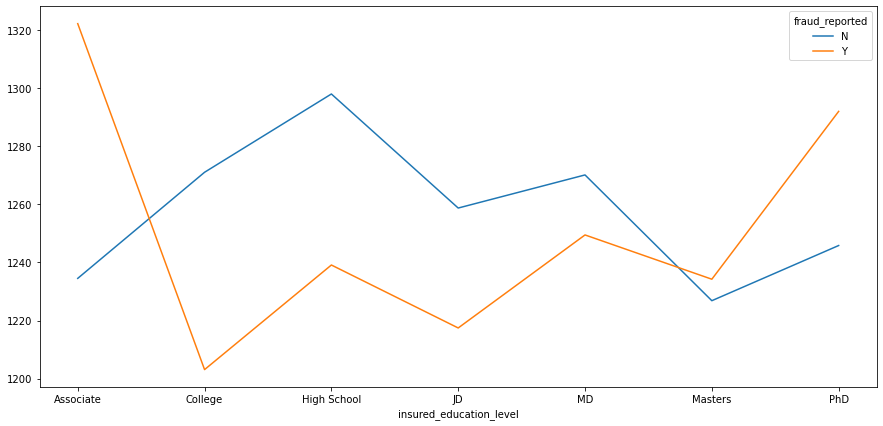

In [62]:
#Annual premium of education level policy_annual_premium
import matplotlib.pyplot as plt

# plot data
fig, ax = plt.subplots(figsize=(15,7))
df_avg_prem = data.groupby(['insured_education_level', 'fraud_reported']).mean()['policy_annual_premium']
df_avg_prem.unstack().plot(ax=ax)

<AxesSubplot:xlabel='insured_occupation'>

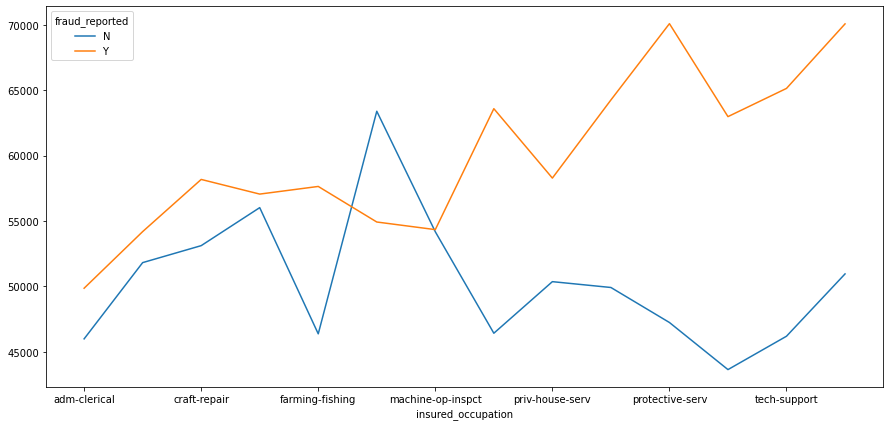

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['insured_occupation', 'fraud_reported']).mean()['total_claim_amount'].unstack().plot(ax=ax)

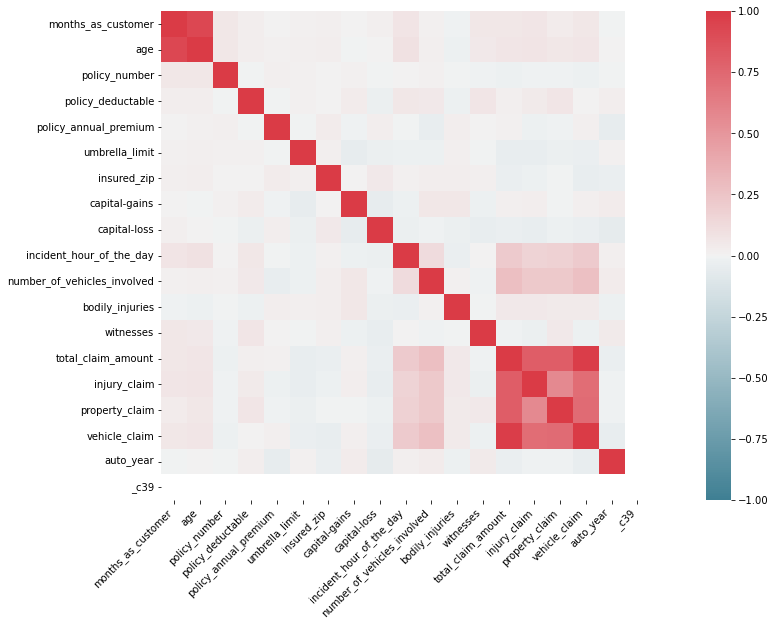

In [64]:
plt.figure(figsize=(20, 9))

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

In [65]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
data = data.drop(deleteCols, axis=1)
data

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation  ... witnesses  \
0                        MD       craft-repair  ...         2   
1                        MD  machine-op-inspct  ...         0   
2                       PhD              sales  ...         3   
3                       PhD       armed-forces  ...         2   
4                 Associate              sales  ...         1   
..                      ...                ...  ...       ...   
995                 Masters       craft-repair  ...         1   
996                     PhD     prof-specialty  ...         3   
997                 Masters       armed-forces  ...         3   
998               Associate  handlers-cleaners  ...         1   
999               Associate              sales  ...         3   

    police_report_available  total_claim_amount  injury_claim property_claim  \
0                       YES               71610          6510          13020   
1                         ?                5070           780            780   
2                        NO               34650          7700           3850   
3                        NO               63400          6340           6340   
4                        NO                6500          1300            650   
..                      ...                 ...           ...            ...   
995                       ?               87200         17440           8720   
996                       ?              108480         18080          18080   
997                     YES               67500          7500           7500   
998                     YES               46980          5220           5220   
999                       ?                5060           460            920   

    vehicle_claim   auto_make auto_model auto_year fraud_reported  
0           52080        Saab        92x      2004              Y  
1            3510    Mercedes       E400      2007              Y  
2           23100       Dodge        RAM      2007              N  
3           50720   Chevrolet      Tahoe      2014              Y  
4            4550      Accura        RSX      2009              N  
..            ...         ...        ...       ...            ...  
995         61040       Honda     Accord      2006              N  
996         72320  Volkswagen     Passat      2015              N  
997         52500      Suburu    Impreza      1996   

In [66]:
#Handle Categorical Data
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [67]:
#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
data = data.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

data

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                   328   48               1000                1406.91   
1                   228   42               2000                1197.22   
2                   134   29               2000                1413.14   
3                   256   41               2000                1415.74   
4                   228   44               1000                1583.91   
..                  ...  ...                ...                    ...   
995                   3   38               1000                1310.80   
996                 285   41               1000                1436.79   
997                 130   34                500                1383.49   
998                 458   62               2000                1356.92   
999                 456   60               1000                 766.19   

     umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0                 0          53300             0                         5   
1           5000000              0             0                         8   
2           5000000          35100             0                         7   
3           6000000          48900        -62400                         5   
4           6000000          66000        -46000                        20   
..              ...            ...           ...                       ...   
995               0              0             0                        20   
996               0          70900             0                        23   
997         3000000          35100             0                         4   
998         5000000              0             0                         2   
999               0              0             0                         6   

     number_of_vehicles_involved  bodily_injuries  ...  auto_model_Pathfinder  \
0                              1                1  ...                      0   
1                              1                0  ...                      0   
2                              3                2  ...                      0   
3                              1                1  ...                      0   
4                              1                0  ...                      0   
..                           ...              ...  ...                    ...   
995                            1                0  ...                      0   
996                            1                2  ...                      0   
997                            3                2  ...                      0   
998                            1                0  ...                      0   
999                            1                0  ...                      0   

     auto_model_RAM  auto_model_RSX  auto_model_Silverado  auto_model_TL  \
0                 0               0                     0              0   
1                 0               0                     0              0   
2                 1               0                     0              0   
3                 0               0                     0              0   
4                 0               1                     0              0   
..              ...             ...                   ...            ...   
995               0               0                     0              0   
996               0               0                     0              0   
997               0               0                     0              0   
998               0               0                     0              0   
999               0               0                     0              0   

     auto_model_Tahoe  auto_model_Ultima  auto_model_Wrangler  auto_model_X5  \
0                   0                  0                    0              0   
1                   0                  0                    0              0   
2                   0                  0             

In [68]:
from sklearn.model_selection import train_test_split

y = data['fraud_reported']
X = data.drop(['fraud_reported'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [69]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.7333333333333333

In [70]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[108,   5],
       [ 35,   2]], dtype=int64)

In [71]:
print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.76      0.96      0.84       113
           1       0.29      0.05      0.09        37

    accuracy                           0.73       150
   macro avg       0.52      0.50      0.47       150
weighted avg       0.64      0.73      0.66       150

Cross-Validated Accuracy: 0.73


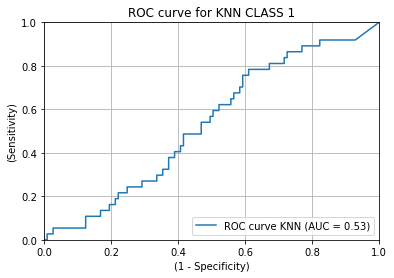

In [72]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

# Q.4

### Project Description

*Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of restaurants.*


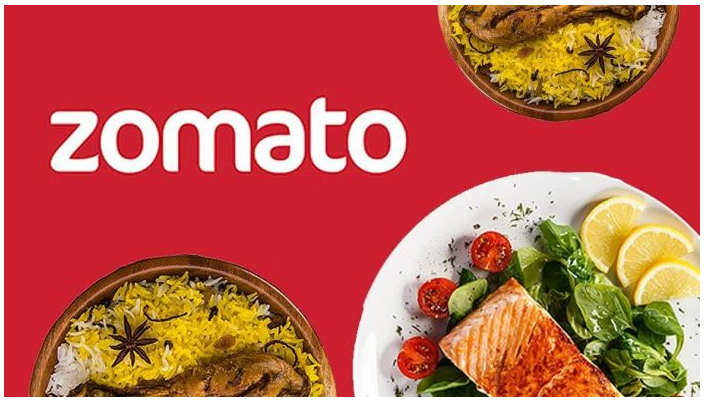

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [74]:
zomato_df = pd.read_csv(r"zomato.csv")

zomato_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [75]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [76]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [77]:
zomato_df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [78]:
zomato_df.shape

(9551, 21)

In [79]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<AxesSubplot:>

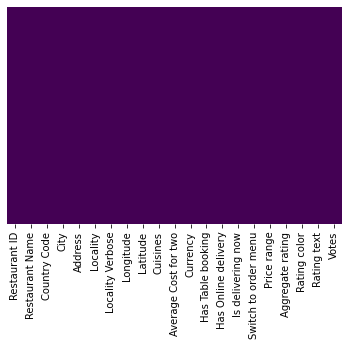

In [80]:
sns.heatmap(zomato_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [81]:
zomato_df_country=pd.read_excel(r'C:\Users\Pawan Kumar\Downloads\Country-Code.xlsx')
zomato_df_country.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [82]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [83]:
final_zomato_df=pd.merge(zomato_df,zomato_df_country,on='Country Code',how='left')
final_zomato_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [84]:
final_zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [85]:
final_zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [86]:
country_name=final_zomato_df.Country.value_counts().index

In [87]:
country_val=final_zomato_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x1cc4f85e1f0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39f%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73f%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87f%')])

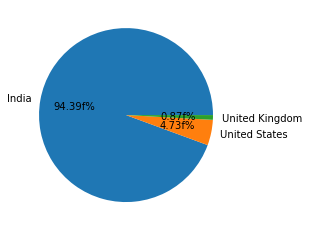

In [88]:
#top 3 pie chart
plt.pie(country_val[:3],labels=country_name[:3],autopct='%1.2ff%%')

In [89]:
final_zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [90]:
ratings=final_zomato_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})
ratings

Aggregate rating Rating color Rating text  Rating Counts
0                0.0        White   Not rated           2148
1                1.8          Red        Poor              1
2                1.9          Red        Poor              2
3                2.0          Red        Poor              7
4                2.1          Red        Poor             15
5                2.2          Red        Poor             27
6                2.3          Red        Poor             47
7                2.4          Red        Poor             87
8                2.5       Orange     Average            110
9                2.6       Orange     Average            191
10               2.7       Orange     Average            250
11               2.8       Orange     Average            315
12               2.9       Orange     Average            381
13               3.0       Orange     Average            468
14               3.1       Orange     Average            519
15               3.2       Orange     Average            522
16               3.3       Orange     Average            483
17               3.4       Orange     Average            498
18               3.5       Yellow        Good            480
19               3.6       Yellow        Good            458
20               3.7       Yellow        Good            427
21               3.8       Yellow        Good            400
22               3.9       Yellow        Good            335
23               4.0        Green   Very Good            266
24               4.1        Green   Very Good            274
25               4.2        Green   Very Good            221
26               4.3        Green   Very Good            174
27               4.4        Green   Very Good            144
28               4.5   Dark Green   Excellent             95
29               4.6   Dark Green   Excellent             78
30               4.7   Dark Green   Excellent             42
31               4.8   Dark Green   Excellent             25
32               4.9   Dark Green   Excellent             61

In [91]:
ratings.head()

Aggregate rating Rating color Rating text  Rating Counts
0               0.0        White   Not rated           2148
1               1.8          Red        Poor              1
2               1.9          Red        Poor              2
3               2.0          Red        Poor              7
4               2.1          Red        Poor             15

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

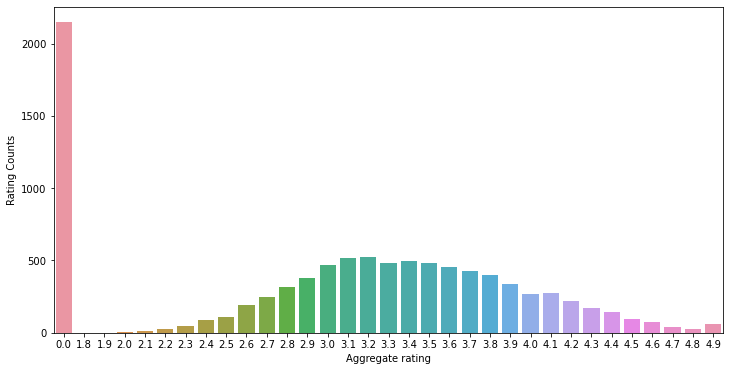

In [94]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Counts',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

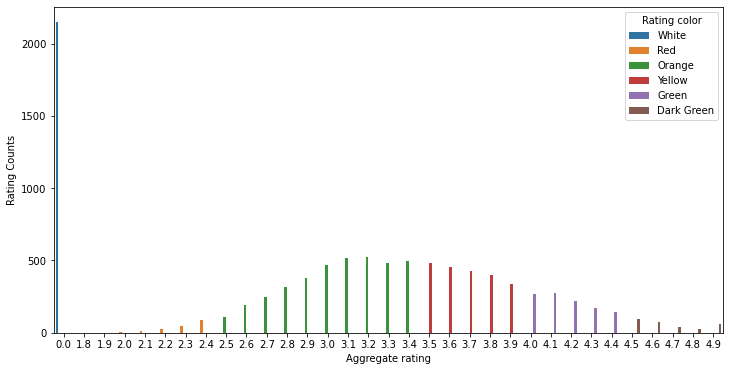

In [95]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Counts'>

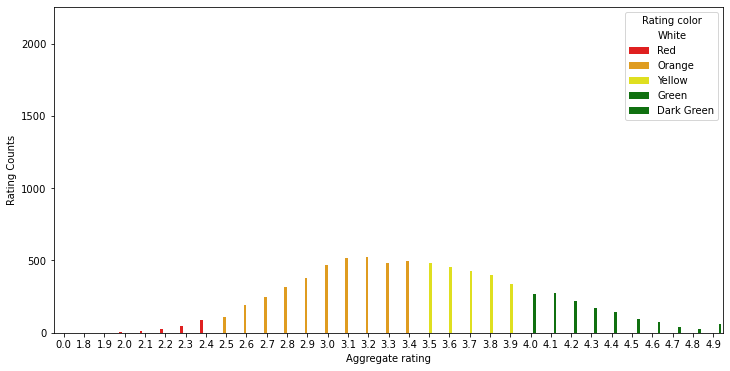

In [96]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green', 'green'])

<AxesSubplot:xlabel='Rating color', ylabel='count'>

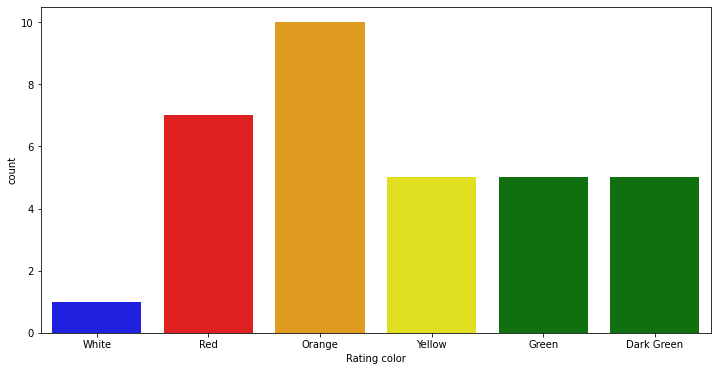

In [97]:
sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green', 'green'])

In [98]:
final_zomato_df[final_zomato_df['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

In [99]:
#which currency is used by which country
final_zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [100]:
final_zomato_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

Country                Currency     0
0        Australia               Dollar($)    24
1           Brazil      Brazilian Real(R$)    60
2           Canada               Dollar($)     4
3            India      Indian Rupees(Rs.)  8652
4        Indonesia  Indonesian Rupiah(IDR)    21
5      New Zealand           NewZealand($)    40
6      Phillipines        Botswana Pula(P)    22
7            Qatar         Qatari Rial(QR)    20
8        Singapore               Dollar($)    20
9     South Africa                 Rand(R)    60
10       Sri Lanka   Sri Lankan Rupee(LKR)    20
11          Turkey        Turkish Lira(TL)    34
12             UAE      Emirati Diram(AED)    60
13  United Kingdom              Pounds(��)    80
14   United States               Dollar($)   434

In [101]:
#which countries has online deleveries options
final_zomato_df[[ 'Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

Country Has Online delivery     0
0        Australia                  No    24
1           Brazil                  No    60
2           Canada                  No     4
3            India                  No  6229
4            India                 Yes  2423
5        Indonesia                  No    21
6      New Zealand                  No    40
7      Phillipines                  No    22
8            Qatar                  No    20
9        Singapore                  No    20
10    South Africa                  No    60
11       Sri Lanka                  No    20
12          Turkey                  No    34
13             UAE                  No    32
14             UAE                 Yes    28
15  United Kingdom                  No    80
16   United States                  No   434

In [102]:
## create a piechart for cites disterbusions
final_zomato_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

([<matplotlib.patches.Wedge at 0x1cc3f252370>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

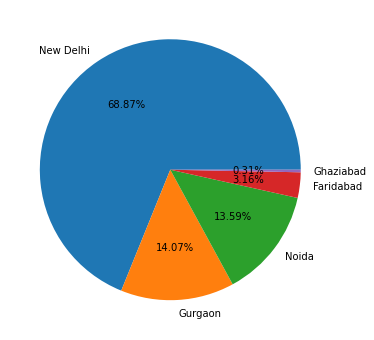

In [105]:
city_values=final_zomato_df.City.value_counts().values
city_lables=final_zomato_df.City.value_counts().index
plt.pie(city_values[:5],labels=city_lables[:5],autopct='%1.2f%%')